In [71]:
#importing the necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [72]:
#importing the data, data was not in the regular format so was edited in excel before loading 
df = pd.read_csv('bank.csv')

In [73]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [74]:
df.shape

(45211, 17)

In [75]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [77]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [78]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [79]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [80]:
categorical = [var for var in df.columns if df[var].dtype == "O"]

In [81]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [82]:
df[categorical].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


<Figure size 1440x720 with 0 Axes>

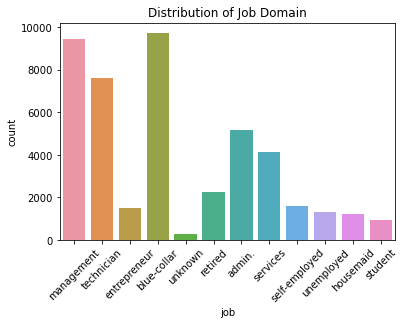

In [83]:
plt.figure(figsize=(20, 10))
ax = plt.subplots()
ax = sns.countplot(x= df['job'])
ax.set_title("Distribution of Job Domain")
plt.xticks(rotation=45)
plt.show()

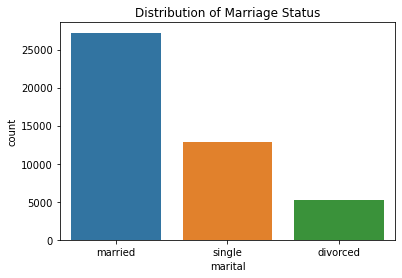

In [84]:
ax = plt.subplots()
ax = sns.countplot(x="marital", data = df)
ax.set_title("Distribution of Marriage Status")
plt.show()

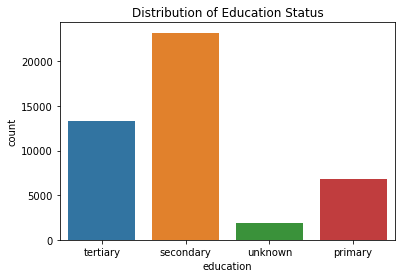

In [85]:
ax = plt.subplots()
ax = sns.countplot(x="education", data = df)
ax.set_title("Distribution of Education Status")
plt.show()

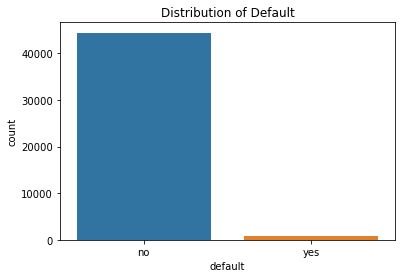

In [86]:
ax = plt.subplots()
ax = sns.countplot(x="default", data = df)
ax.set_title("Distribution of Default")
plt.show()

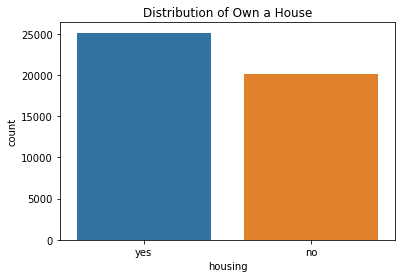

In [87]:
ax = plt.subplots()
ax = sns.countplot(x="housing", data = df )
ax.set_title("Distribution of Own a House")
plt.show()

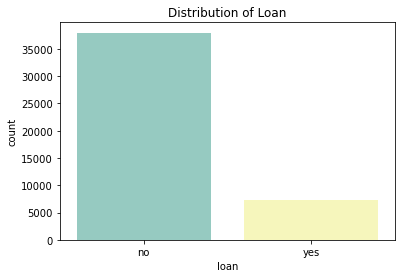

In [88]:
ax = plt.subplots()
ax = sns.countplot(x="loan", data = df, palette= "Set3")
ax.set_title("Distribution of Loan")
plt.show()

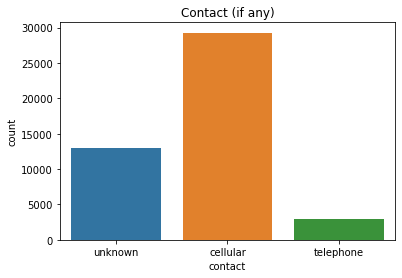

In [89]:
ax = plt.subplots()
ax = sns.countplot(x="contact", data = df)
ax.set_title("Contact (if any)")
plt.show()

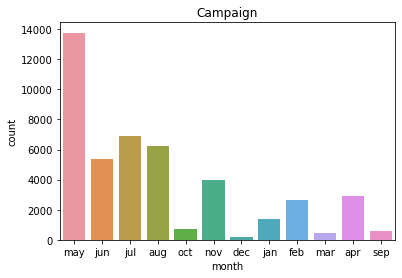

In [90]:
ax = plt.subplots()
ax = sns.countplot(x="month", data = df)
ax.set_title("Campaign")
plt.show()

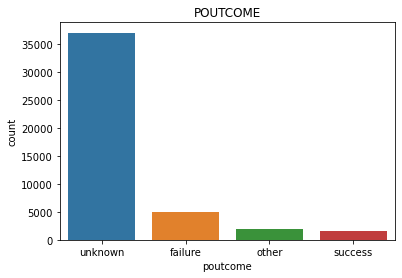

In [91]:
ax = plt.subplots()
ax = sns.countplot(x="poutcome", data = df)
ax.set_title("POUTCOME")
plt.show()

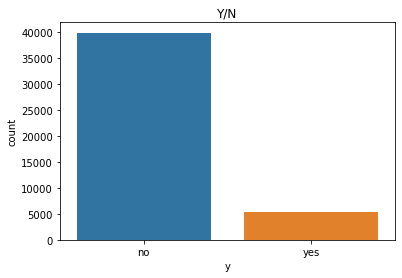

In [92]:
ax = plt.subplots()
ax = sns.countplot(x="y", data = df)
ax.set_title("Y/N")
plt.show()

In [93]:
correlation = df.corr()

<AxesSubplot:>

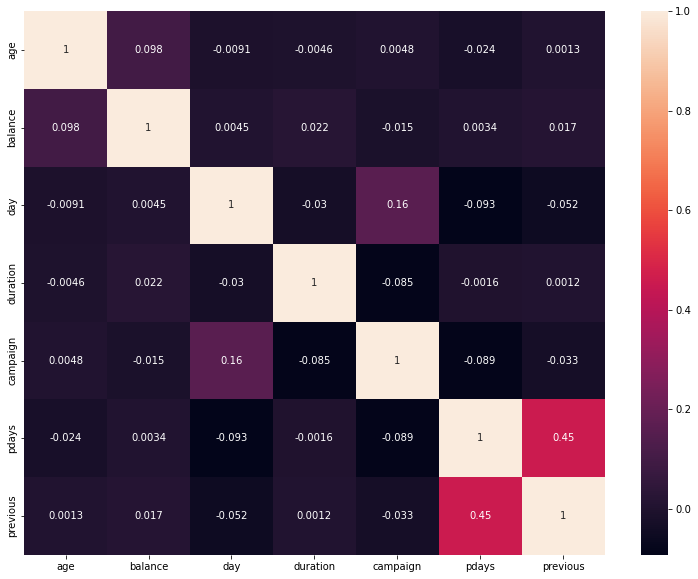

In [94]:
plt.figure(figsize=(13, 10))

sns.heatmap(df.corr(), annot=True)

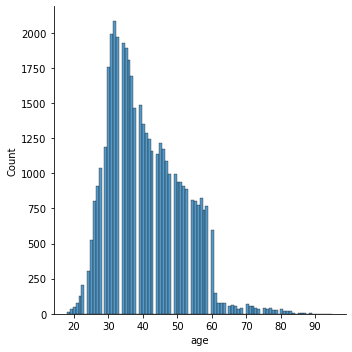

In [95]:
sns.displot(df['age'])

In [96]:
# import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [97]:
#importing OrdinalEncoder for the categorical variables
from sklearn.preprocessing import OrdinalEncoder
chord_end = OrdinalEncoder()
for i in categorical:
    df[[i]] = chord_end.fit_transform(df[[i]])

In [98]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0.0


In [99]:
#specifying the train and test data 
y = df.y.values
x = df.drop(["y"], axis = 1)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [101]:
#importing the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [102]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

r_accuracy = rf.score(x_test, y_test)*100

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(r_accuracy))

Random Forest Algorithm Accuracy Score : 90.12%


In [103]:
# K Nearest neighbour
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(x_train, y_train)
knn_accuracy = knn.score(x_test, y_test)*100

print("Test Accuracy {:.2f}%".format(knn_accuracy))

Test Accuracy 88.53%


As can be seen we get maximum accuracy score in Random Forest Classifier .